In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Preprocess

In [3]:
directory = './csvFiles'

In [4]:
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

In [5]:
df_list = []
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path).iloc[280:]
    df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
    df_list.append(df)

C:\Users\admin\AppData\Local\Temp\ipykernel_29452\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_29452\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_29452\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_29452\914781413.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)
C:\Users\admin\AppData\Local\Temp\ipykernel_29452\914781413.py:5

In [6]:
combined_df = pd.concat(df_list, ignore_index=True)

In [7]:
combined_df

,Frame,Time,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipPosX,m_avg_L_HipPosY,...,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristPosX,m_avg_R_WristPosY,m_avg_R_WristPosZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Unnamed: 128
0,281.0,3.21,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
1,282.0,3.22,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
2,283.0,3.23,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
3,284.0,3.24,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
4,285.0,3.25,0.34,0.28,0.54,0.00,180.00,0.00,0.4,0.20,...,0.00,180.00,0.00,-0.39,0.76,0.62,0.00,180.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282506,6609.0,73.51,0.06,0.48,1.14,358.24,358.39,0.71,0.0,0.39,...,7.21,346.10,349.96,0.76,0.90,1.21,357.14,3.21,347.35,NaN
1282507,6610.0,73.53,0.06,0.48,1.14,358.24,358.39,0.71,0.0,0.39,...,7.22,346.23,349.95,0.76,0.90,1.21,356.62,3.42,347.09,NaN
1282508,6611.0,73.54,0.06,0.48,1.14,358.56,359.12,0.70,0.0,0.39,...,7.23,346.34,349.94,0.76,0.90,1.21,355.43,3.78,346.54,NaN
1282509,6612.0,73.55,0.06,0.48,1.14,358.56,359.12,0.70,0.0,0.39,...,7.24,346.51,349.97,0.76,0.90,1.20,354.11,4.22,345.88,NaN


In [8]:
len(combined_df)

1282511

In [9]:
rotation_columns = [col for col in combined_df.columns if 'Rot' in col]
rotation_df = combined_df[rotation_columns]

In [10]:
# -180~180 사이로 정규화
normalize_angle = lambda x: (x - 360) if x > 180 else (x + 360) if x < -180 else x
rotation_df = rotation_df.apply(lambda col: col.apply(normalize_angle))
# combined_df[rotation_columns] = rotation_df

In [11]:
rotation_df.head()

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
1,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
2,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
3,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0
4,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0


In [12]:
# 이전 프레임과의 차이를 계산하여 변화량 DataFrame을 생성
rotation_change_df = rotation_df.diff().abs()

In [13]:
# 평균 변화량을 계산하는 함수
def calculate_average_change(rotation_df):
    rotation_change_df = rotation_df.diff().abs()
    # 첫 번째 행의 NaN 값을 0으로 채우기 (또는 다른 합리적인 값으로 채울 수 있음)
    rotation_change_df.iloc[0] = rotation_change_df.iloc[0].fillna(0)
    # 모든 joint의 변화량에 대한 평균을 계산
    average_change = rotation_change_df.mean(axis=1)
    return average_change

In [14]:
# 평균 변화량을 기준으로 데이터를 1, 2, 3단계로 나누는 함수
def categorize_average_change(average_change, thresholds):
    # 변화량에 따라 범주화
    categories = np.digitize(average_change, thresholds)
    return categories

In [15]:
# DataFrame에 변화량 범주를 추가하는 함수
def add_change_category_to_df(rotation_df, thresholds):
    average_change = calculate_average_change(rotation_df)
    change_categories = categorize_average_change(average_change, thresholds)
    rotation_df['Rot_diff_category'] = change_categories
    return rotation_df

In [16]:
# 임계값 설정 (예: [5, 10])
thresholds = [5, 10]
combined_df = add_change_category_to_df(rotation_df, thresholds)

In [17]:
# -180 ~ 180 범위를 벗어나는 값이 있는지 확인
num_values_out_of_range = (combined_df > 180).sum().sum() + (combined_df < -180).sum().sum()

# 결과 확인
if num_values_out_of_range > 0:
    print(f"범위를 벗어나는 값의 수: {num_values_out_of_range}")
else:
    print("범위를 벗어나는 값이 없습니다.")

범위를 벗어나는 값이 없습니다.


In [18]:
category_counts = combined_df['Rot_diff_category'].value_counts()
print(category_counts)

Rot_diff_category
0    1191073
1      60982
2      30456
Name: count, dtype: int64


In [19]:
combined_df.head()

,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipRotX,m_avg_L_HipRotY,m_avg_L_HipRotZ,m_avg_L_KneeRotX,m_avg_L_KneeRotY,m_avg_L_KneeRotZ,m_avg_L_AnkleRotX,...,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Rot_diff_category
0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
1,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
2,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
3,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0
4,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0,...,0.0,180.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0


In [20]:
combined_df.to_csv('./combined_df.csv', index=False)

# LSTM Learning

In [21]:
# 변환된 데이터를 DataFrame으로 변환
combined_df = pd.DataFrame(combined_df, columns=combined_df.columns)

In [22]:
train = combined_df.iloc[:897757]
test = combined_df.iloc[897757:]

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val = train_test_split(train, test_size=0.2, random_state=42, shuffle=False)

In [25]:
n_input = 30
n_features = 64
batch_size = 128

# TimeseriesGenerator 생성
train_generator  = TimeseriesGenerator(X_train.values, X_train.values, length=n_input, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val.values, X_val.values, length=n_input, batch_size=batch_size)

In [26]:
train_generator.length

30

In [27]:
len(train_generator)

5611

In [28]:
X, y = train_generator[0]

In [29]:
X.shape

(128, 30, 64)

In [30]:
y.shape

(128, 64)

In [31]:
y

array([[  17.17,  165.1 ,   -2.37, ...,  -95.84, -109.04,    1.  ],
       [  -4.72,    5.95,   -2.05, ...,  -27.42,  -71.02,    0.  ],
       [ -25.89, -157.28,  -10.27, ...,  -17.28,  -87.15,    0.  ],
       ...,
       [  68.67, -161.99,   16.15, ...,  -13.57,  -69.86,    1.  ],
       [  29.49,  140.94,   -7.11, ..., -102.95, -122.31,    0.  ],
       [  -1.71,   -1.  ,   -2.01, ...,  -41.63,  -83.45,    0.  ]])

In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, BatchNormalization, Dense, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.losses import Loss

In [33]:
model = Sequential()

# 첫 번째 LSTM 층
model.add(LSTM(512, activation='tanh', recurrent_dropout=0, return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

# 두 번째 LSTM 층
model.add(LSTM(512, activation='tanh', recurrent_dropout=0, return_sequences=False))
model.add(Dropout(0.2))

# 추가 Dense 층 및 배치 정규화 층
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

# 또 다른 Dense 층 및 배치 정규화 층
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

# 출력층
model.add(Dense((21 * 3) +  1))

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # patience를 10 -> 5로 조정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.0001)  # patience를 5 -> 3으로 조정
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=True)



In [34]:
# 가중치를 적용할 열 이름
# weighted_columns = [
#     'm_avg_L_WristRotX', 'm_avg_L_WristRotY', 'm_avg_L_WristRotZ',
#     'm_avg_R_WristRotX', 'm_avg_R_WristRotY', 'm_avg_R_WristRotZ',
#     'm_avg_HeadRotX', 'm_avg_HeadRotY', 'm_avg_HeadRotZ'
# ]

# # 가중치를 적용할 열 인덱스
# weighted_columns_indices = [42, 43, 44, 48, 49, 50, 60, 61, 62]  # 예시 인덱스
# rot_diff_category_index = combined_df.columns.get_loc('Rot_diff_category')  # Rot_diff_category 열의 인덱스

# # 가중치 값
# weight_for_weighted_columns = 3
# weights_for_rot_diff_category = [1.0, 1.5, 2.0]  # 1단계, 2단계, 3단계에 대한 가중치


In [35]:
# 사용자 정의 손실 함수
# class CustomLoss(Loss):
#     def __init__(self, rot_diff_category, weights_for_rot_diff_category, **kwargs):
#         super().__init__(**kwargs)
#         self.rot_diff_category = rot_diff_category
#         self.weights_for_rot_diff_category = weights_for_rot_diff_category

#     def call(self, y_true, y_pred):
#         # 기본 MSE 계산
#         mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)

#         # Rot_diff_category에 따른 가중치 적용
#         for category, weight in enumerate(self.weights_for_rot_diff_category, start=1):
#             category_mask = tf.cast(self.rot_diff_category == category, tf.float32)
#             mse += weight * tf.reduce_mean(tf.square(y_true - y_pred) * category_mask, axis=-1)

#         return mse

# custom_loss_instance = CustomLoss(rot_diff_category_index, weights_for_rot_diff_category)

In [36]:
class CustomLoss(Loss):
    def __init__(self, weighted_columns_indices, weight_for_weighted_columns, weights_for_rot_diff_category, **kwargs):
        super().__init__(**kwargs)
        self.weighted_columns_indices = tf.constant(weighted_columns_indices, dtype=tf.int32)
        self.weight_for_weighted_columns = weight_for_weighted_columns
        self.weights_for_rot_diff_category = tf.constant(weights_for_rot_diff_category, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # y_pred의 마지막 feature를 rot_diff_category로 분리
        y_pred_values = y_pred[:, :-1]
        rot_diff_pred = y_pred[:, -1]

        # 런타임에 형태 확인
        # tf.print("y_true shape:", tf.shape(y_true))
        # tf.print("y_pred_values shape:", tf.shape(y_pred_values))

        # MSE 계산
        mse = tf.reduce_mean(tf.square(y_true[:, :-1] - y_pred_values), axis=-1)

        # 특정 joint rotation에 대한 가중치 적용
        weighted_mse = tf.gather(y_pred_values, self.weighted_columns_indices, axis=1)
        weighted_mse = tf.square(weighted_mse) * self.weight_for_weighted_columns
        mse += tf.reduce_mean(weighted_mse, axis=-1)

        # rot_diff_category에 따른 가중치 적용
        for category in range(len(self.weights_for_rot_diff_category)):
            category_mask = tf.cast(tf.equal(rot_diff_pred, category), tf.float32)
            category_mask = tf.expand_dims(category_mask, -1)  
            weighted_mse = tf.square(y_true[:, :-1] - y_pred_values) * category_mask
            mse += self.weights_for_rot_diff_category[category] * tf.reduce_mean(weighted_mse, axis=-1)

        return mse

# 가중치를 적용할 열 인덱스와 가중치 값
weighted_columns_indices = [42, 43, 44, 48, 49, 50, 60, 61, 62]  # 예시 인덱스
weight_for_weighted_columns = 2.0
weights_for_rot_diff_category = [1.0, 1.5, 2.0]  # 1단계, 2단계, 3단계에 대한 가중치

# CustomLoss 인스턴스 생성
custom_loss_instance = CustomLoss(
    weighted_columns_indices=weighted_columns_indices,
    weight_for_weighted_columns=weight_for_weighted_columns,
    weights_for_rot_diff_category=weights_for_rot_diff_category
)

In [37]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss=custom_loss_instance)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 512)           1181696   
                                                                 
 dropout (Dropout)           (None, 30, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 512)               2099200   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                        

In [39]:
# 사용 가능한 GPU 목록을 출력합니다.
print("Available GPUs:", tf.config.experimental.list_physical_devices('GPU'))

# 현재 장치를 출력합니다.
print("Current device:", tf.test.gpu_device_name())

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Current device: /device:GPU:0


In [40]:
model.fit(
    train_generator, 
    epochs=50, 
    validation_data=val_generator,
    # callbacks=[early_stopping, reduce_lr, model_checkpoint, csv_logger]
    callbacks=[reduce_lr, model_checkpoint, csv_logger]

    )

Epoch 1/50


5611/5611 [==============================] - 66s 11ms/step - loss: 5103.7188 - val_loss: 5067.8906 - lr: 0.0010
Epoch 2/50
5611/5611 [==============================] - 63s 11ms/step - loss: 5068.3008 - val_loss: 5067.6978 - lr: 0.0010
Epoch 3/50
5611/5611 [==============================] - 63s 11ms/step - loss: 5066.3359 - val_loss: 5068.9590 - lr: 0.0010
Epoch 4/50
5611/5611 [==============================] - 63s 11ms/step - loss: 5063.5557 - val_loss: 5206.8433 - lr: 0.0010
Epoch 5/50
5611/5611 [==============================] - 63s 11ms/step - loss: 5066.6362 - val_loss: 5086.6782 - lr: 0.0010
Epoch 6/50
5611/5611 [==============================] - 63s 11ms/step - loss: 5061.7769 - val_loss: 5080.9004 - lr: 0.0010
Epoch 7/50
5611/5611 [==============================] - 62s 11ms/step - loss: 5053.2251 - val_loss: 5112.4507 - lr: 2.0000e-04
Epoch 8/50
5611/5611 [==============================] - 62s 11ms/step - loss: 5049.7739 - val_loss: 5170.4067 - lr: 2.0000e-04
Epoch 9/50
5611/561

In [41]:
model.save('final_model_LSTM.h5')

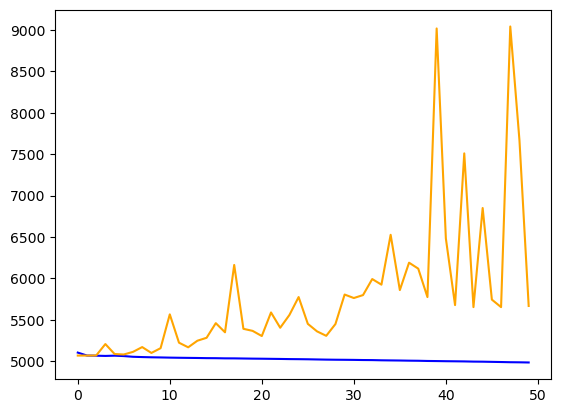

In [42]:
myloss = model.history.history['loss']
myval_loss = model.history.history['val_loss']
plt.plot(range(len(myloss)),myloss, label='Training Loss', color='blue')
plt.plot(range(len(myval_loss)), myval_loss, label='Validation Loss', color = 'orange')


# Test with real data

In [ ]:
test_df = pd.read_csv('./B01_TransformData_FinalAvatar_20230922_171230.csv').iloc[280:]

In [ ]:
test_df.head()

In [ ]:
test_rotation_columns = [col for col in test_df.columns if 'Rot' in col]
test_rotation_df = test_df[test_rotation_columns]

In [ ]:
test_rotation_df

In [ ]:
#-180~180 사이로 정규화
normalize_angle = lambda x: (x - 360) if x > 180 else (x + 360) if x < -180 else x
test_df[test_rotation_columns] = test_df[test_rotation_columns].applymap(normalize_angle)

In [ ]:
test_df = test_df[test_rotation_columns].map(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)

In [ ]:
test_df

In [ ]:
# -180 ~ 180 범위를 벗어나는 값이 있는지 확인
num_values_out_of_range = (test_df > 180).sum().sum() + (test_df < -180).sum().sum()

# 결과 확인
if num_values_out_of_range > 0:
    print(f"범위를 벗어나는 값의 수: {num_values_out_of_range}")
else:
    print("범위를 벗어나는 값이 없습니다.")

In [ ]:
# 평균 변화량 계산 및 범주화
def calculate_average_change(test_df):
    rotation_change_df = test_df.diff().abs()
    rotation_change_df.iloc[0] = rotation_change_df.iloc[0].fillna(0)
    average_change = rotation_change_df.mean(axis=1)
    return average_change

In [ ]:
def categorize_average_change(average_change, thresholds):
    categories = np.digitize(average_change, thresholds)
    return categories

In [ ]:
# 테스트 데이터에 변화량 범주 추가
def add_change_category_to_df(test_df, thresholds):
    average_change = calculate_average_change(test_df)
    change_categories = categorize_average_change(average_change, thresholds)
    test_df['Rot_diff_category'] = change_categories
    return test_df

In [ ]:
thresholds = [5, 10]
test_df = add_change_category_to_df(test_df, thresholds)

In [ ]:
test_df.shape

In [ ]:
# 결과를 새로운 CSV 파일로 저장합니다.
test_df.to_csv('./test_df.csv', index=False)

In [ ]:
# 예측 값을 넣을 빈 리스트
test_predictions = []
# 훈련 데이터셋에서 마지막 입력 개수의 값을 가져온 후
first_eval_batch = test_df[-n_input:]
first_eval_batch = first_eval_batch.to_numpy()
# LSTM이 원하는 형식으로 데이터를 reshape (TimeSeriesGenerator와 같은 형식)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# 어디까지 예측할 것인지 결정하는 부분 (지금은 12개의 데이터를 예측하므로 test 데이터셋의 길이만큼)
for i in range(10):
    # 마지막 포인트보다 한 시점 뒤를 예측
    current_pred = model.predict(current_batch)[0] # 예측값의 []를 한쌍 없애기 위해 [0]
    current_pred = np.array([normalize_angle(y) for y in current_pred]) # 예측값을 정규화

    # 예측값을 predictions 리스트에 추가
    test_predictions.append(current_pred)

    # 현재 배치가 예측값을 포함하도록 '업데이트'
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
test_predictions_array = np.array(test_predictions)

In [ ]:
print(test_predictions_array.shape)

In [ ]:
# numpy 배열을 pandas 데이터프레임으로 변환
test_predictions = pd.DataFrame(test_predictions)

# test_predictions 데이터프레임을 CSV 파일로 저장합니다.
test_predictions.to_csv('./test_predictions.csv', index=True)

In [ ]:
test_predictions.head()

In [ ]:
column_order = [
    'm_avg_PelvisRotX', 'm_avg_PelvisRotY', 'm_avg_PelvisRotZ',
    'm_avg_L_HipRotX', 'm_avg_L_HipRotY', 'm_avg_L_HipRotZ',
    'm_avg_L_KneeRotX', 'm_avg_L_KneeRotY', 'm_avg_L_KneeRotZ',
    'm_avg_L_AnkleRotX', 'm_avg_L_AnkleRotY', 'm_avg_L_AnkleRotZ',
    'm_avg_L_FootRotX', 'm_avg_L_FootRotY', 'm_avg_L_FootRotZ',
    'm_avg_R_HipRotX', 'm_avg_R_HipRotY', 'm_avg_R_HipRotZ',
    'm_avg_R_KneeRotX', 'm_avg_R_KneeRotY', 'm_avg_R_KneeRotZ',
    'm_avg_R_AnkleRotX', 'm_avg_R_AnkleRotY', 'm_avg_R_AnkleRotZ',
    'm_avg_R_FootRotX', 'm_avg_R_FootRotY', 'm_avg_R_FootRotZ',
    'm_avg_Spine1RotX', 'm_avg_Spine1RotY', 'm_avg_Spine1RotZ',
    'm_avg_Spine2RotX', 'm_avg_Spine2RotY', 'm_avg_Spine2RotZ',
    'm_avg_L_CollarRotX', 'm_avg_L_CollarRotY', 'm_avg_L_CollarRotZ',
    'm_avg_L_ShoulderRotX', 'm_avg_L_ShoulderRotY', 'm_avg_L_ShoulderRotZ',
    'm_avg_L_ElbowRotX', 'm_avg_L_ElbowRotY', 'm_avg_L_ElbowRotZ',
    'm_avg_L_WristRotX', 'm_avg_L_WristRotY', 'm_avg_L_WristRotZ',
    'm_avg_NeckRotX', 'm_avg_NeckRotY', 'm_avg_NeckRotZ',
    'm_avg_HeadRotX', 'm_avg_HeadRotY', 'm_avg_HeadRotZ',
    'm_avg_R_CollarRotX', 'm_avg_R_CollarRotY', 'm_avg_R_CollarRotZ',
    'm_avg_R_ShoulderRotX', 'm_avg_R_ShoulderRotY', 'm_avg_R_ShoulderRotZ',
    'm_avg_R_ElbowRotX', 'm_avg_R_ElbowRotY', 'm_avg_R_ElbowRotZ',
    'm_avg_R_WristRotX', 'm_avg_R_WristRotY', 'm_avg_R_WristRotZ',
    'Rot_diff_category'
]
# input 데이터(test_df)의 마지막 5 프레임과 
last_inputs_df = test_df.iloc[-5:][column_order].reset_index(drop=True)
test_predictions_df = pd.DataFrame(test_predictions_array, columns=column_order)

test_combined_df = pd.concat([last_inputs_df, test_predictions_df], ignore_index=True)

In [ ]:
test_combined_df

In [ ]:
test_combined_df.to_csv('./test_combined_df.csv', index=True)